# Lab 3 - Bayesian Decision Theory 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import sys

import scipy.stats

## Question 1: Bayesian Decision Rules for Classification

Classification problem: Discriminate between healthy people and people with anemia, where we assume that 90% of population is healthy, and 10% has anemia. We also assume that only one variable(feature x) impacts the class of the person (c1=healthy, c2=anemia), red blood cell count (in millions). Data likelihood given class information is as follows:
 - $(x|c1)\sim N(\mu=5.5, \sigma^2 = 0.75^2)$
 - $(x|c2)\sim N(\mu=3.0, \sigma^2 = 1.4^2)$
 
Given the observation $x=3.5$, what is the class of the patient?

Prior class probabilities

In [3]:
pi_1 = 0.9
pi_2 = 0.1

Likelihood

In [4]:
from scipy.stats import norm

def plot_normal(gloc, gscale):
    x = np.linspace(0,8,1000)
    y = norm.pdf(x, loc=gloc, scale=gscale)    # for example
    plt.plot(x,y)
    axes = plt.gca()
    axes.set_ylim([0,0.6])
    plt.show()

In [5]:
# assume normal distribution
x_c1_mu = 5.5
x_c1_sigma = 0.75
x_c2_mu = 3.0
x_c2_sigma = 1.4

x_obs = 3.5

In [6]:
1.4**2

1.9599999999999997

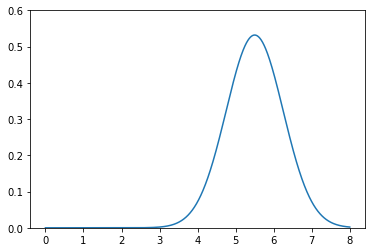

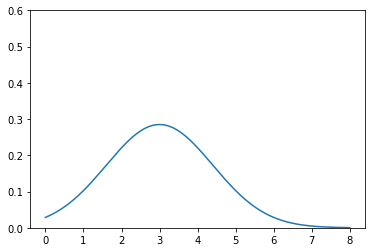

0.015
0.267


In [7]:
plot_normal(x_c1_mu, x_c1_sigma)
plot_normal(x_c2_mu, x_c2_sigma)

print(round(scipy.stats.norm(x_c1_mu, x_c1_sigma).pdf(x_obs),3))
print(round(scipy.stats.norm(x_c2_mu, x_c2_sigma).pdf(x_obs),3))


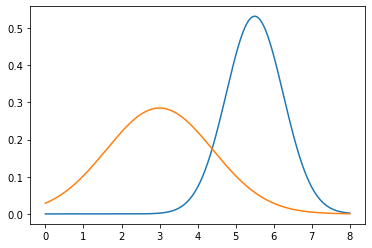

In [11]:
x = np.linspace(0,8,1000)
y1 = norm.pdf(x, loc=x_c1_mu, scale=x_c1_sigma)
y2 = norm.pdf(x, loc=x_c2_mu, scale=x_c2_sigma)
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [8]:
round(scipy.stats.norm(x_c1_mu, x_c1_sigma).pdf(x_obs),3)*0.9

0.0135

In [9]:
round(scipy.stats.norm(x_c1_mu, x_c1_sigma).cdf(x_obs),3)

0.004

In [10]:
round(scipy.stats.norm(x_c2_mu, x_c2_sigma).pdf(x_obs),3)*0.1

0.0267

In [11]:
round(scipy.stats.norm(x_c2_mu, x_c2_sigma).cdf(x_obs),3)

0.64

In [12]:
posterior_c1 = round(scipy.stats.norm(x_c1_mu, x_c1_sigma).pdf(x_obs)*pi_1,3)
posterior_c1

0.014

In [13]:
posterior_c2 = round(scipy.stats.norm(x_c2_mu, x_c2_sigma).pdf(x_obs)*pi_2,3)
posterior_c2

0.027

In [14]:
if(posterior_c1 > posterior_c2):
    predicted_c = 1
else:
    predicted_c = 2
predicted_c

2

Finding a decision boundary

In [16]:
for val in np.arange(0.0, 8.0, 0.01):
    posterior_c1 = round(scipy.stats.norm(x_c1_mu, x_c1_sigma).pdf(val)*pi_1,3)
    posterior_c2 = round(scipy.stats.norm(x_c2_mu, x_c2_sigma).pdf(val)*pi_2,3)
    if(posterior_c1 > posterior_c2):
        print("Decision boundary",val)
        break

Decision boundary 3.69


Error calculation

In [17]:
min_error = 1
min_xval = 0
for x_val in np.arange(0.0, 8.0, 0.01):
    new_error = 0
    new_error += round(scipy.stats.norm(x_c1_mu, x_c1_sigma).cdf(x_val),3)*pi_1
    new_error += (1-round(scipy.stats.norm(x_c2_mu, x_c2_sigma).cdf(x_val),3))*pi_2
    if(new_error < min_error):
        min_error = new_error
        min_xval = x_val

print("min_error",min_error)
print("min_xval",min_xval)

min_error 0.037899999999999996
min_xval 3.67


In [18]:
min_xval = 4.1
new_error = round(scipy.stats.norm(x_c1_mu, x_c1_sigma).cdf(min_xval),3)*pi_1
new_error += (1-round(scipy.stats.norm(x_c2_mu, x_c2_sigma).cdf(min_xval),3))*pi_2
round(new_error,4)

0.0495

In [19]:
round(scipy.stats.norm(x_c1_mu, x_c1_sigma).cdf(4.1),3)

0.031

In [27]:
1-round(scipy.stats.norm(x_c2_mu, x_c2_sigma).cdf(4.1),3)

0.21599999999999997

## Question 2: Discriminant Functions 

$\textbf{(a) Generate a toy classification problem dataset for the cartesian coordinate system with two classes (K=2).}$
1. Pick two random cluster center coordinates.
2. For each cluster center, generate 20 data points (samples) by adding random noise values to cluster center values.
3. Store dataset X along with ground truth label values for each sample.
4. Shuffle the dataset (randomize the order of samples in your dataset).

1. Pick Centers

In [20]:
center1_x = 8
center1_y = 11

center2_x = 8
center2_y = 12

Place centers into a dictionary for later

In [21]:
centers_dict = {}
centers_dict[(center1_x,center1_y)] = "class1"
centers_dict[(center2_x,center2_y)] = "class2"
centers_dict

{(8, 11): 'class1', (8, 12): 'class2'}

2. Generate 20 data points as noise around each center

In [22]:
np.random.seed(0)
sample_x_1 = np.random.uniform(center1_x-1, center1_x+1, 20)
sample_x_2 = np.random.uniform(center2_x-1, center2_x+1, 20)

sample_y_1 = np.random.uniform(center1_y-1, center1_y+1, 20)
sample_y_2 = np.random.uniform(center2_y-1, center2_y+1, 20)



In [23]:
  #  Raed   for my    

import random

#raed = random.value(10)
#print("randint:", raed)

r = random.choices(range(20), k=20)
print(r)



[15, 5, 6, 16, 19, 10, 1, 5, 12, 13, 19, 4, 17, 1, 15, 0, 4, 6, 8, 5]


3. Place dataset with ground truth 

In [24]:
data_dict = {}

for i in range(0,20):
    new_tuple = (sample_x_1[i],sample_y_1[i])
    data_dict[new_tuple] = "class1"
    
for i in range(0,20):
    new_tuple = (sample_x_2[i],sample_y_2[i])
    data_dict[new_tuple] = "class2"

4. shuffle the data points 

In [25]:
datapoints = list(data_dict.keys())      # Python 3; use keys = d.keys() in Python 2
random.shuffle(datapoints)

$\textbf{(b) Assuming P(C_i | x) is correlated with Euclidean distance between the class center and data point.}$
1. Calculate prediction g(x) for each data point.
2. Report correct classification and misclassification counts.

1. Calculate prediction g(x) for each data point.

In [27]:
def euclidean_distance(q1,p1,q2,p2):
    first_term = (q1-p1)*(q1-p1)
    second_term = (q2-p2)*(q2-p2)
    result = math.sqrt(first_term+second_term)
    return result

In [28]:
centers_dict.items()

dict_items([((8, 11), 'class1'), ((8, 12), 'class2')])

In [29]:
def predict_class(centers, datapoint):
    current_class = "unknown"
    current_distance = sys.maxsize
    for key,val in centers.items():
        distance = euclidean_distance(key[0],datapoint[0],key[1],datapoint[1])
        if distance < current_distance:
            current_distance = distance
            current_class = val
    return current_class

In [30]:
result_dict = {}
for i in datapoints:
    result_dict[i] = predict_class(centers_dict,i)

2. Report on correct and incorrect classifications 

In [31]:
correct_count = 0
for i in result_dict:
    if result_dict[i] == data_dict[i]:
        correct_count += 1
correct_count

30

$\textbf{(c) Plot dataset along with predictions.}$

1. Plot color coded cluster centers.
2. Plot generated data points, where color of the data points represent predicted cluster.

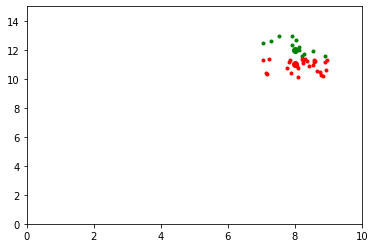

In [32]:
plt.subplots()
plt.axis([0, 10, 0, 15])
plt.plot(center1_x, center1_y, 'ro')
plt.plot(center2_x, center2_y, 'go')

for key,val in result_dict.items():
    if val == "class1":
        plt.plot(key[0], key[1], 'r.')
    else:
        plt.plot(key[0], key[1], 'g.')
plt.show()


In [33]:
result_dict.items()

dict_items([((7.529111224209254, 12.952918930026792), 'class2'), ((8.136867897737297, 12.209691039490092), 'class2'), ((8.09762700785465, 10.719015801147572), 'class1'), ((8.957236684465528, 11.317939167291039), 'class1'), ((7.875174422525385, 10.420765122147682), 'class1'), ((8.889337834099168, 11.194202551586123), 'class1'), ((8.598317128433447, 11.220750282328611), 'class1'), ((8.224191445444843, 11.56561392515282), 'class2'), ((8.548467378868434, 11.937302403295403), 'class2'), ((7.922958724505864, 12.312659178930547), 'class2'), ((8.136089122187865, 11.976747676118453), 'class2'), ((7.040436794880652, 11.306216650930796), 'class1'), ((8.56105835257291, 11.276365902697227), 'class1'), ((8.430378732744838, 10.874063907598682), 'class1'), ((8.057789839505809, 10.87720302692464), 'class1'), ((8.291788226133312, 11.34127573923632), 'class1'), ((8.235270994151755, 11.078375584508642), 'class1'), ((7.84730959867781, 11.333533430891336), 'class1'), ((8.556313501899702, 10.932621545712612)

$\textbf{(d) In which cases does this system produce wrong classifications?}$

The system will produce wrong classifications in the following cases:
1. If the centers are too close to each other and you have points that are equadistant
2. If the data points are classified as a class but don't meet the euclidean distance criteria 